In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/Ehsan/Desktop/Country-data.csv')
data

## import kardane dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df = pd.DataFrame(data)
df.isnull().sum()

## sakhte dataframe va check kardane missing value ha : missing value nadashtim

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df.corr()

## corellation bein feature ha ke 2 soton gdpp va health daraye correlation bishtari va ahameyat balatari baraye hadaf ma  hastand

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [5]:
df['country'].unique()

## name of countries in dataset

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

Text(0.5, 1.0, 'Health vs Gdpp')

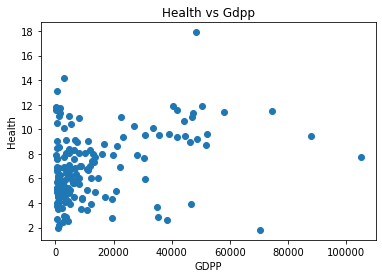

In [7]:
plt.scatter(df['gdpp'],df['health'])
plt.xlabel('GDPP')
plt.ylabel('Health')
plt.title('Health vs Gdpp')

## plot gdpp va health

In [8]:
## soton haye mohem : gdpp ,income, health , life_expec , total_fer

df2 = df.drop(axis=1 , columns='country')
df2

X = df2['gdpp']
y = df2['health']

## tarif x ,y baraye modesazi

In [9]:
## parametrhaye kmean clustering
km_set={'init':'random' , 'n_init':10 , 'max_iter':300 , 'random_state':42}


## normalize kardane dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(df2)

In [10]:
from sklearn.cluster import KMeans

l = []

for k in range(1,11):
    km = KMeans(n_clusters=k , **km_set)
    km.fit(scaled_features)
    l.append(km.inertia_)

## yaftane behtarin k    

C:\Users\Ehsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


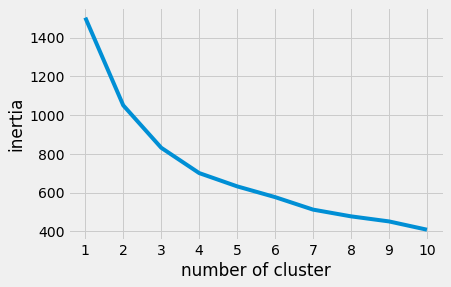

In [11]:
plt.style.use('fivethirtyeight')
plt.xticks(range(1,11))
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.plot(range(1,11),l)

## namayesh behtarin k dar nemodar

In [12]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11) , l ,curve='convex' , direction='decreasing')
k1.elbow

## behtarin tedade custer 4 ast

4

In [13]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=20
)
y_km = km.fit_predict(scaled_features)

## train model ba k-mean

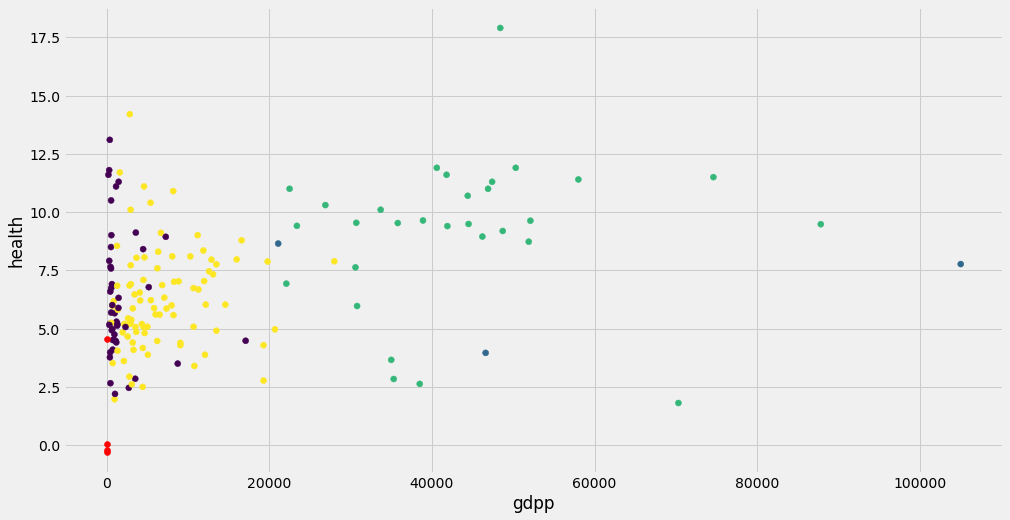

In [14]:
plt.figure(figsize=(15,8))
centroids = km.cluster_centers_
plt.scatter(X,y,c=km.labels_.astype(float) )
plt.scatter(centroids[:,2],centroids[:,3] , c='red')
plt.xlabel('gdpp')
plt.ylabel('health')
plt.show()

## namyeshe cluster ha roye nemodar

In [15]:
a = km.labels_

In [16]:
df['labels']=a

## ezafe kardane labelhaye yaft shode be dataset asli

In [17]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [29]:
df.loc[df.labels==0]

##faghirtarin keshavarha dar cluster 0 gharar darand

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0


In [61]:
from sklearn.decomposition import PCA
pca = PCA(2)

## ejraye PCA ba 3 vajh

In [62]:
data = pca.fit_transform(scaled_features)
model2 = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=20
)

#train model ba estefade az pca

In [63]:
label2 = model2.fit_predict(data)

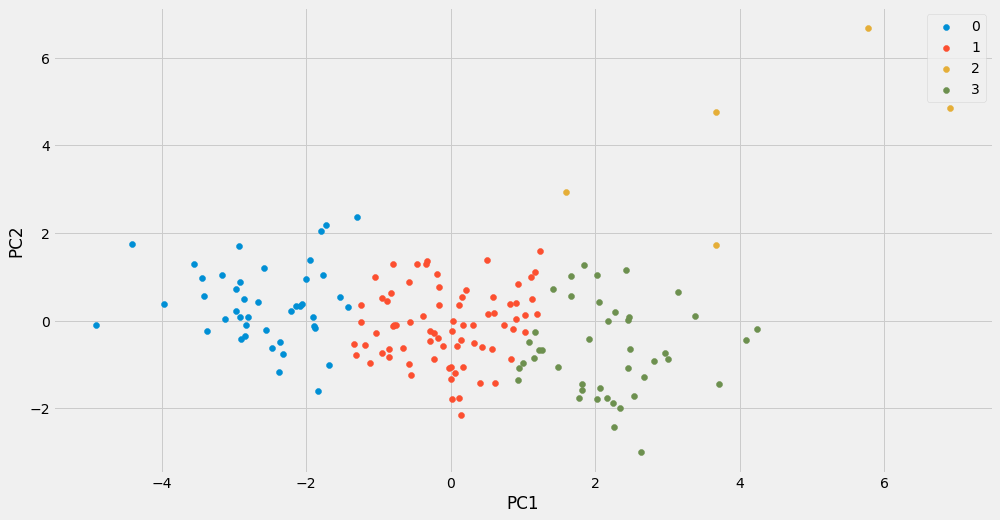

In [74]:
plt.figure(figsize=(15,8))
uniq_labels = np.unique(label2)
for i in uniq_labels:
  plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## plot pca ha

In [65]:
model2.labels_

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 0, 1, 1, 3, 1,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 3, 1, 1, 0, 0, 0, 3, 0, 3, 3, 3,
       3, 1, 1, 1, 1, 0, 0, 3, 1, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1,
       0, 3, 3, 1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 1, 0, 1, 3, 1, 0, 1, 3, 0,
       0, 1, 3, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       3, 3, 0, 0, 3, 1, 0, 1, 1, 1, 1, 3, 3, 3, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0])

In [121]:
#df.drop(axis=1 , columns='PCAlabels' , inplace=True)

In [66]:
df['PCAlabels'] = model2.labels_

## afzodane natige cluster bandi ba raveshe pca  be dataset

In [67]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,PCAlabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


In [73]:
df.loc[df.PCAlabels == 0]
## poorest countries in cluster=0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,PCAlabels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,0,0
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,0,0
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,0,0
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,0,0
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,0,0
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,0,0
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,0,0
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,0,0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,0,0
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,0,0
